### Khai Báo Biến

In [258]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

### Đọc File

In [259]:
df = pd.read_csv('ds_salaries.csv')

### Preview Data

In [260]:
# In 5 dòng đầu
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023.0,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023.0,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023.0,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,NaN,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [261]:
# In 5 dòng cuối
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020.0,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021.0,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020.0,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020.0,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021.0,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


### Độ Lớn Của Dữ Liệu

In [262]:
# Lấy kích thước của dữ liệu (số dòng và số cột)
num_rows, num_columns = df.shape

# In kết quả
print(f"Số dòng của dữ liệu: {num_rows}")
print(f"Số cột của dữ liệu: {num_columns}")

Số dòng của dữ liệu: 3755
Số cột của dữ liệu: 11


### Kiểu Dữ Liệu

In [263]:
# Lấy thông tin về kiểu dữ liệu của từng cột
column_data_types = df.dtypes

# In kết quả
print(column_data_types)

work_year             float64
experience_level       object
employment_type        object
job_title              object
salary                  int64
salary_currency        object
salary_in_usd           int64
employee_residence     object
remote_ratio            int64
company_location       object
company_size           object
dtype: object


### Thông Tin Dữ Liệu

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           3751 non-null   float64
 1   experience_level    3755 non-null   object 
 2   employment_type     3755 non-null   object 
 3   job_title           3755 non-null   object 
 4   salary              3755 non-null   int64  
 5   salary_currency     3755 non-null   object 
 6   salary_in_usd       3755 non-null   int64  
 7   employee_residence  3755 non-null   object 
 8   remote_ratio        3755 non-null   int64  
 9   company_location    3755 non-null   object 
 10  company_size        3755 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 322.8+ KB


### Kiểm Tra Và Xóa Các Ô Dữ Liệu Bị Thiếu

In [265]:
# Tổng dữ liệu bị thiếu ở mỗi cột
a = df.isnull().sum()
print (a)
# In kích thước dữ liệu trước khi xóa các dòng chứa dữ liệu bị thiếu
print("Kích thước dữ liệu trước khi xóa các dòng chứa dữ liệu bị thiếu:")
print(df.shape)

# Xóa các dòng chứa dữ liệu bị thiếu (NaN)
data_cleaned = df.dropna()

# In kích thước dữ liệu sau khi xóa các dòng chứa dữ liệu bị thiếu
print("\nKích thước dữ liệu sau khi xóa các dòng chứa dữ liệu bị thiếu:")
print(data_cleaned.shape)

work_year             4
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
Kích thước dữ liệu trước khi xóa các dòng chứa dữ liệu bị thiếu:
(3755, 11)

Kích thước dữ liệu sau khi xóa các dòng chứa dữ liệu bị thiếu:
(3751, 11)


In [266]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

### Tổng Hợp Thống Kê

In [267]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3751.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.372967,1.906956e+05,137570.389880,46.271638
std,0.691514,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


### Tổng Mức Lương (USD) 

In [268]:
# Tổng Mức Lương (USD) Của Các Công Ty Có Độ Lớn Khác Nhau 
df.groupby('company_size')['salary_in_usd'].sum().sort_values(ascending=False)

company_size
M    451290619
L     53708646
S     11577549
Name: salary_in_usd, dtype: int64

In [269]:

# Tổng Mức Lương (USD) Của Các Mức Độ Kinh Nghiệm Khác Nhau
df.groupby('experience_level')['salary_in_usd'].sum().sort_values(ascending=False)

experience_level
SE    385076496
MI     84143381
EN     25134811
EX     22222126
Name: salary_in_usd, dtype: int64

### Tổng Số Lượng Các Công Việc

In [270]:
df['job_title'].value_counts()

job_title
Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: count, Length: 93, dtype: int64

### Tổng Các Công Ty Ở Từng Khu Vực

In [271]:
df.company_location.value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: count, Length: 72, dtype: int64

### Tổng Các Quy Mô Của Công Ty

In [272]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

### Biểu Đồ Lương Theo Mức Độ Kinh Nghiệm

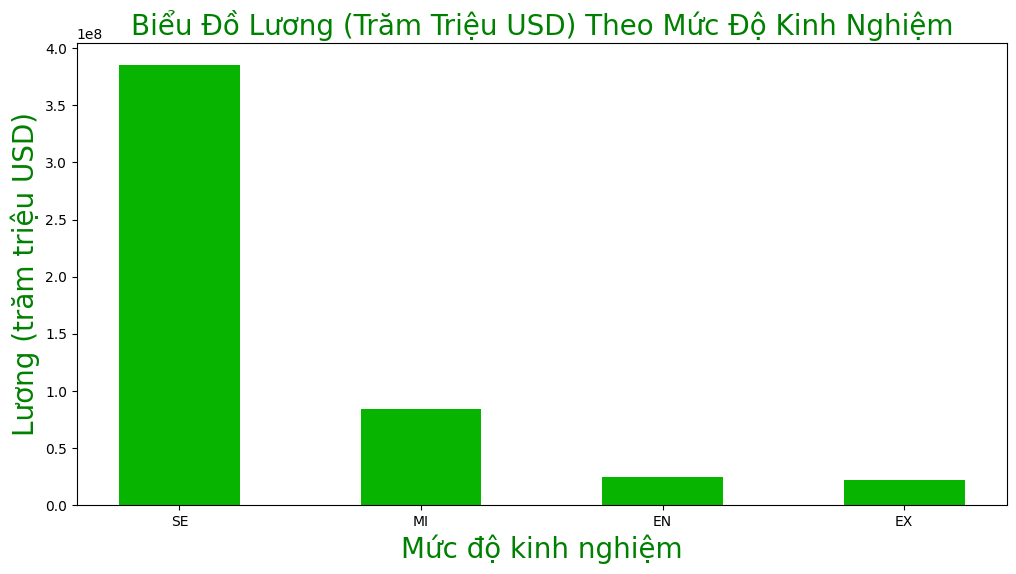

experience_level
SE    385076496
MI     84143381
EN     25134811
EX     22222126
Name: salary_in_usd, dtype: int64

In [273]:
# Gán Biến Và Sắp Xếp Giá Trị Tăng Dần
value = df.groupby('experience_level')['salary_in_usd'].sum()
value = value.sort_values(ascending=False)  

#Vẽ Biểu Đồ
font1 = {'color':'green','size':20}
plt.figure(figsize=(12,6))
plt.bar(value.index, value.values, color = '#07b500', width=0.5)
plt.xlabel("Mức độ kinh nghiệm", fontdict=font1)
plt.ylabel("Lương (trăm triệu USD)", fontdict=font1)
plt.title("Biểu Đồ Lương (Trăm Triệu USD) Theo Mức Độ Kinh Nghiệm", fontdict=font1)
plt.show()
value.sort_values(ascending=False)



### Biểu Đồ Năm Làm Việc

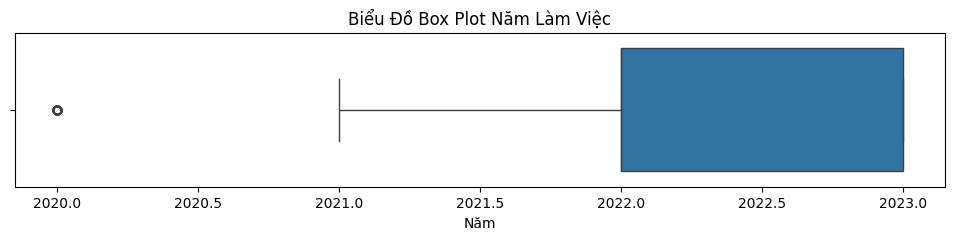

In [274]:

# Vẽ biểu đồ box plot
plt.figure(figsize=(12, 2))
sns.boxplot(x=df['work_year'])
plt.title('Biểu Đồ Box Plot Năm Làm Việc')
plt.xlabel('Năm')
plt.show()


### Số Công Việc Theo Năm

In [275]:
# Số Công Việc Theo Năm
df.work_year.value_counts()

work_year
2023.0    1781
2022.0    1664
2021.0     230
2020.0      76
Name: count, dtype: int64

### Biểu Đồ Thể Hiện Công Việc Theo Năm

[]

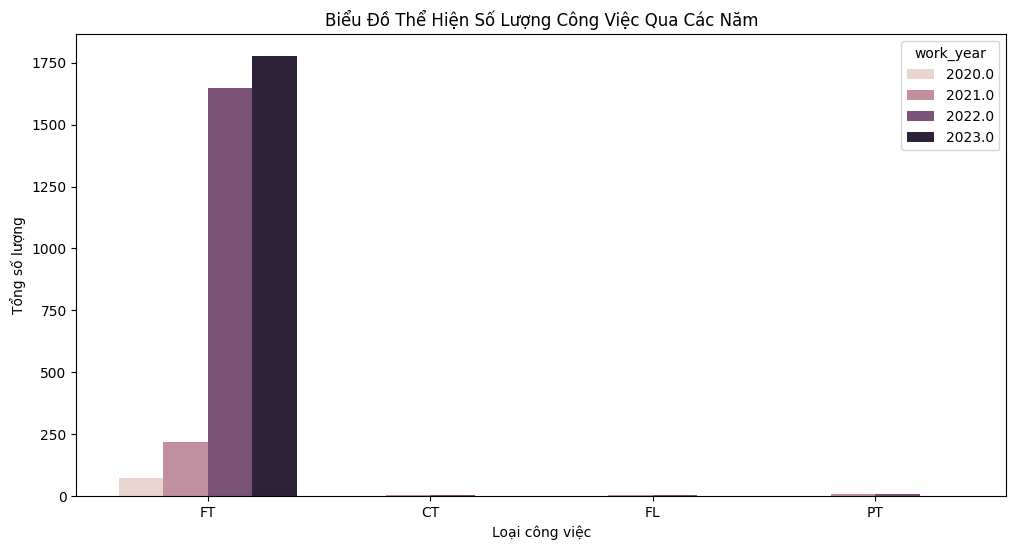

In [276]:
# Gán Biến 
fig, ax = plt.subplots(figsize=(12,6))

# Vẽ Biểu Đồ
ax = sns.countplot(ax=ax, data=df, x=df.employment_type, hue=df.work_year)
plt.xlabel('Loại công việc')
plt.ylabel('Tổng số lượng')
plt.title('Biểu Đồ Thể Hiện Số Lượng Công Việc Qua Các Năm')
ax.plot()

### Biểu Đồ Phân Tích Công Việc Theo Năm

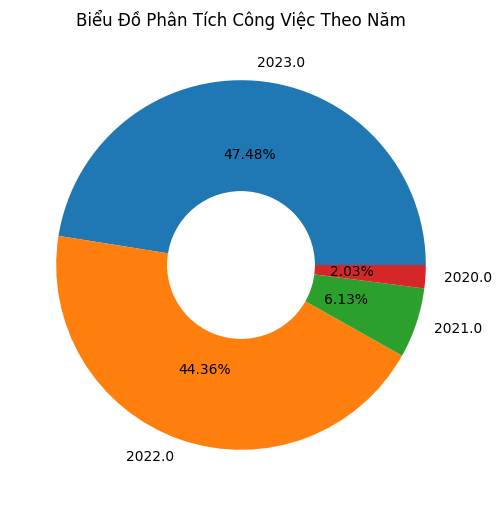

In [277]:

# Tổng dữ liệu năm
Year_data = df['work_year'].value_counts()

# Vẽ biểu đồ phân tích công việc theo năm
fig,ax=plt.subplots(figsize=(6,6))
ax.pie(Year_data.values,labels=Year_data.index,autopct='%1.2f%%' )
ax.pie([1],radius=0.4,colors='white')
plt.title('Biểu Đồ Phân Tích Công Việc Theo Năm')
plt.show()


### Biểu Đồ Thể Hiện Công Việc Năm 2023

                   job_title  job_count
0              Data Engineer        499
1             Data Scientist        369
2               Data Analyst        307
3  Machine Learning Engineer        158
4         Research Scientist         55
5             Data Architect         52
6         Analytics Engineer         46
7          Applied Scientist         39
8          Research Engineer         32
9               Data Manager         22


[]

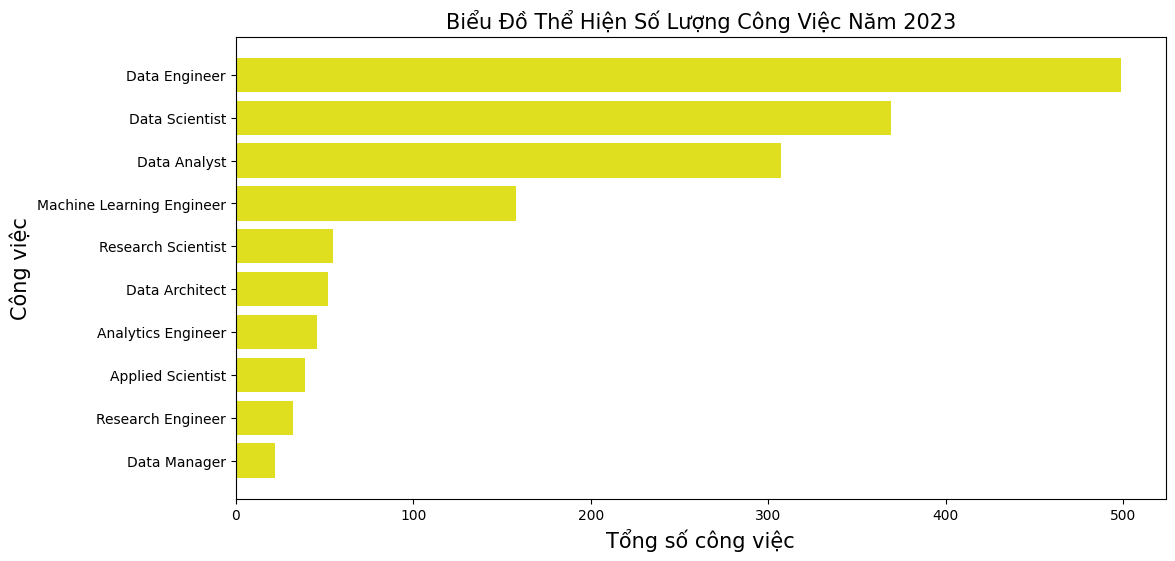

In [278]:
# Lọc Dữ Liệu Có Bao Nhiêu Công Việc Năm 2023
ft = df[df['work_year']==2023].groupby('job_title').size().nlargest(10).sort_values(ascending=False).reset_index(name='job_count')

# In Kết Quả
print (ft)

# Gán Biến Cho Biểu Đồ
fig, ax = plt.subplots(figsize=(12,6))

# Vẽ Biểu Đồ
ax = sns.barplot(ax=ax, data=ft, y=ft.job_title, x=ft.job_count, color ='#FFFF00')
ax.set_xlabel('Tổng số công việc',fontsize =15)
ax.set_ylabel('Công việc', fontsize = 15)
ax.set_title('Biểu Đồ Thể Hiện Số Lượng Công Việc Năm 2023', fontsize =15)
ax.plot()



### Biểu Đồ Thể Hiện Công Việc Năm 2022

                   job_title  job_count
0              Data Engineer        488
1             Data Scientist        405
2               Data Analyst        276
3  Machine Learning Engineer        109
4         Analytics Engineer         57
5             Data Architect         46
6       Data Science Manager         29
7          Applied Scientist         18
8                ML Engineer         15
9         Research Scientist         15


[]

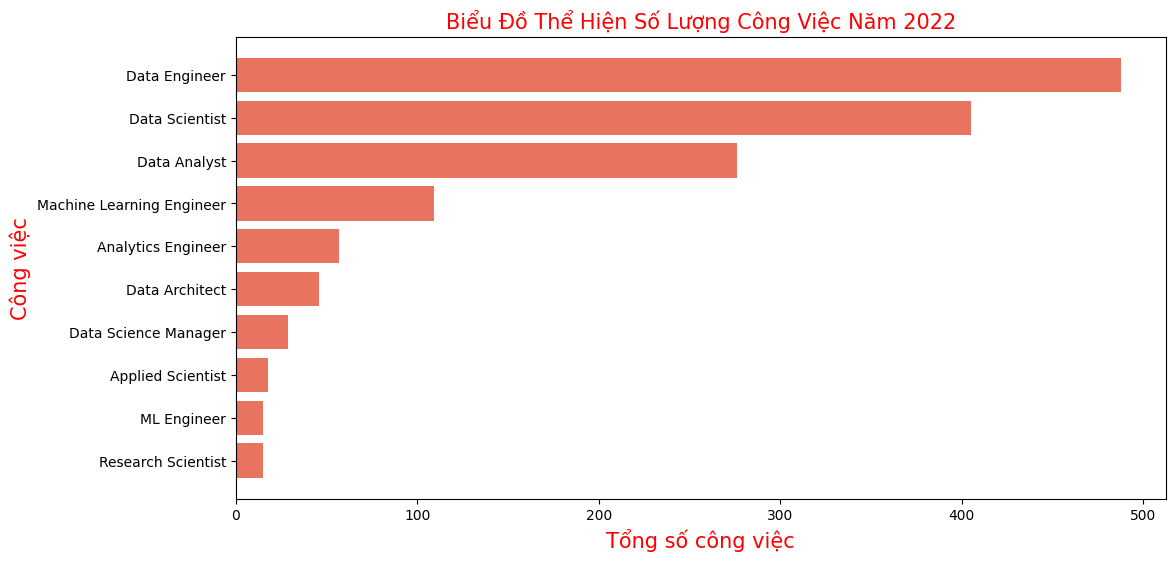

In [279]:
# Lọc Dữ Liệu Có Bao Nhiêu Công Việc Năm 2022
ft = df[df['work_year']==2022].groupby('job_title').size().nlargest(10).sort_values(ascending=False).reset_index(name='job_count')

# In Kết Quả
print (ft)

# Gán Biến Cho Biểu Đồ
fig, ax = plt.subplots(figsize=(12,6))

# Vẽ Biểu Đồ
ax = sns.barplot(ax=ax, data=ft, y=ft.job_title, x=ft.job_count,color ='#FF6347')
ax.set_xlabel('Tổng số công việc',color ='red',fontsize = 15)
ax.set_ylabel('Công việc',color ='red',fontsize = 15)
ax.set_title('Biểu Đồ Thể Hiện Số Lượng Công Việc Năm 2022',color ='red',fontsize = 15)
ax.plot()



### Biểu Đồ Thể Hiện Công Việc Năm 2021

                   job_title  job_count
0             Data Scientist         44
1              Data Engineer         38
2               Data Analyst         21
3  Machine Learning Engineer         18
4         Research Scientist         10
5       Data Science Manager          6
6               AI Scientist          5
7            BI Data Analyst          5
8          Big Data Engineer          5
9    Data Science Consultant          5


[]

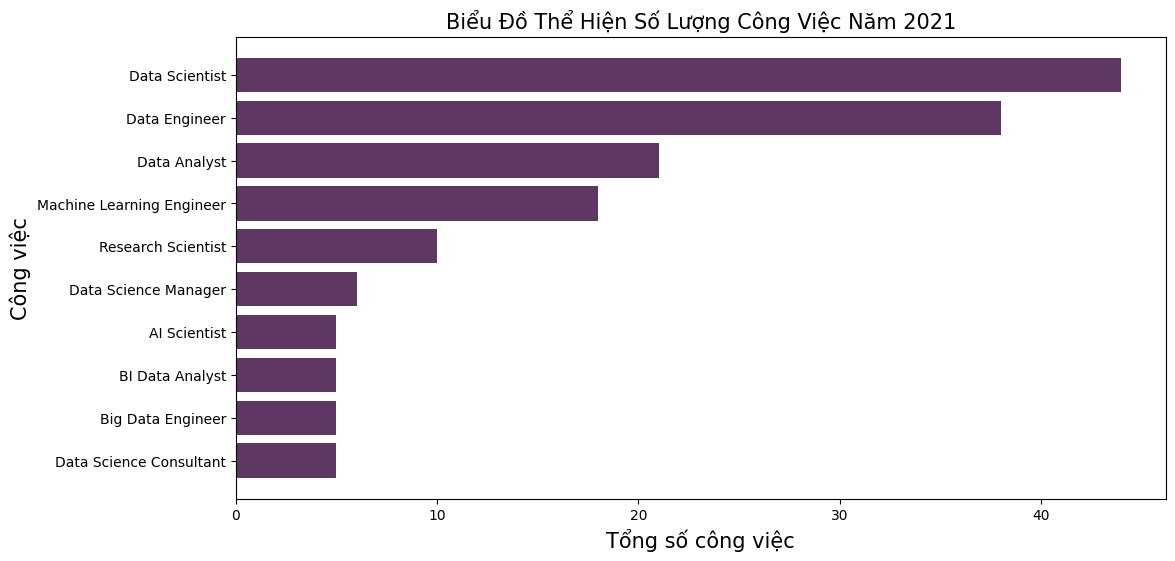

In [280]:
# Lọc Dữ Liệu Có Bao Nhiêu Công Việc Năm 2021
ft = df[df['work_year']==2021].groupby('job_title').size().nlargest(10).sort_values(ascending=False).reset_index(name='job_count')

# In Kết Quả
print (ft)

# Gán Biến Cho Biểu Đồ
fig, ax = plt.subplots(figsize=(12,6))

# Vẽ Biểu Đồ
ax = sns.barplot(ax=ax, data=ft, y=ft.job_title, x=ft.job_count,color ='#63316a')
ax.set_xlabel('Tổng số công việc',fontsize = 15)
ax.set_ylabel('Công việc',fontsize = 15)
ax.set_title('Biểu Đồ Thể Hiện Số Lượng Công Việc Năm 2021',fontsize = 15)
ax.plot()

### Biểu Đồ Thể Hiện Công Việc Năm 2020

                   job_title  job_count
0             Data Scientist         21
1              Data Engineer         15
2               Data Analyst          8
3  Machine Learning Engineer          4
4          Big Data Engineer          3
5      Business Data Analyst          3
6    Data Science Consultant          2
7         Lead Data Engineer          2
8        Lead Data Scientist          2
9       Product Data Analyst          2


[]

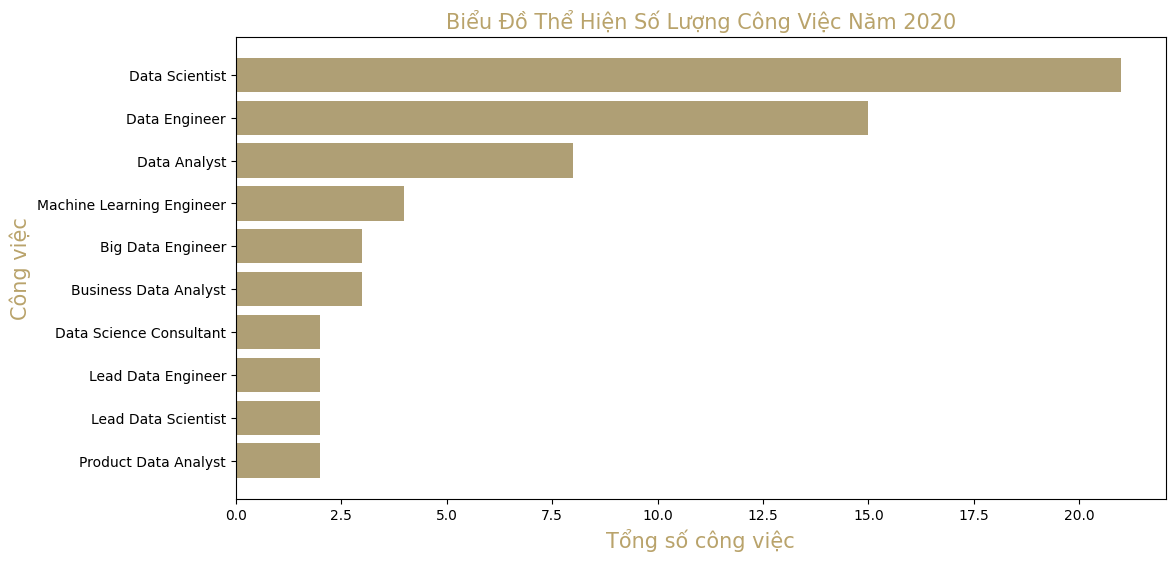

In [281]:
# Lọc Dữ Liệu Có Bao Nhiêu Công Việc Năm 2020
ft = df[df['work_year']==2020].groupby('job_title').size().nlargest(10).sort_values(ascending=False).reset_index(name='job_count')

# In Kết Quả

print (ft)
# Gán Biến Cho Biểu Đồ
fig, ax = plt.subplots(figsize=(12,6))

# Vẽ Biểu Đồ
ax = sns.barplot(ax=ax, data=ft, y=ft.job_title, x=ft.job_count,color ='#b9a36b' )
ax.set_xlabel('Tổng số công việc',color ='#b9a36b', fontsize = 15)
ax.set_ylabel('Công việc',color ='#b9a36b',fontsize = 15)
ax.set_title('Biểu Đồ Thể Hiện Số Lượng Công Việc Năm 2020', color ='#b9a36b',fontsize = 15)
ax.plot()

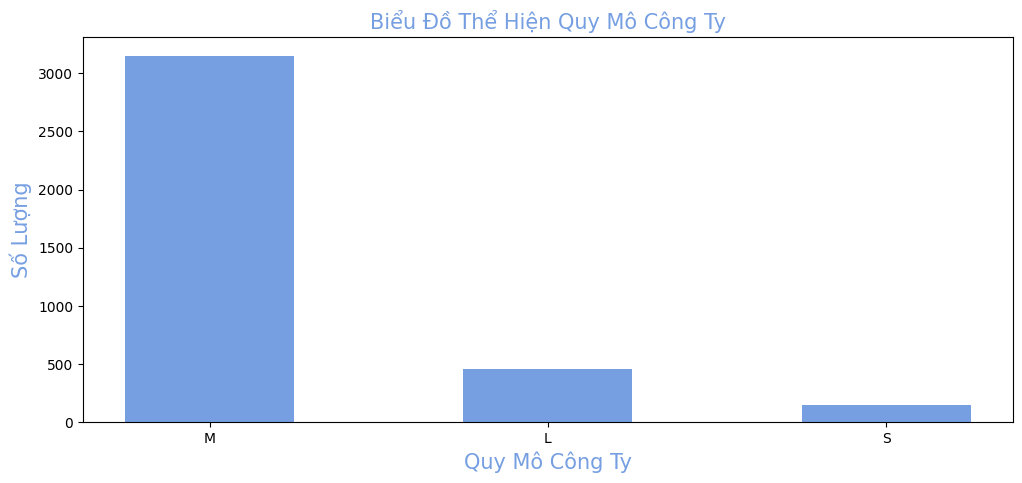

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [282]:
# Tính Tổng Số Quy Mô Công Ty Và Sắp Xếp Tăng Dần
cs= df['company_size'].value_counts()
cs = cs.sort_values(ascending=False)  

# Vẽ Biểu Đồ
plt.figure(figsize=(12,5))
plt.bar(cs.index, cs.values, width=0.5, color ='#769fe2')  
plt.xlabel("Quy Mô Công Ty", color ='#769fe2',fontsize = 15)
plt.ylabel("Số Lượng", color ='#769fe2',fontsize = 15)
plt.title("Biểu Đồ Thể Hiện Quy Mô Công Ty", color ='#769fe2', fontsize = 15)
plt.show()
cs.sort_values(ascending=False)

In [283]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.0,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023.0,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023.0,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023.0,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,NaN,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.0,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021.0,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020.0,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020.0,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [284]:
# Xử lý các cột bị khuyết
imputer = SimpleImputer(strategy='mean')
df['work_year'] = imputer.fit_transform(df[['work_year']])
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.000000,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023.000000,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023.000000,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023.000000,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2022.372967,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.000000,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021.000000,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020.000000,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020.000000,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [285]:
comsize = {'S':0,'M':1,'L':2}
df ['company_size']=[comsize[c] for c in df['company_size']]
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023.000000,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,2
1,2023.000000,MI,CT,ML Engineer,30000,USD,30000,US,100,US,0
2,2023.000000,MI,CT,ML Engineer,25500,USD,25500,US,100,US,0
3,2023.000000,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,1
4,2022.372967,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,1
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.000000,SE,FT,Data Scientist,412000,USD,412000,US,100,US,2
3751,2021.000000,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,2
3752,2020.000000,EN,FT,Data Scientist,105000,USD,105000,US,100,US,0
3753,2020.000000,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,2


In [287]:
#OneHotEncoder
endcoder = OneHotEncoder()
matrix = endcoder.fit_transform(df[['experience_level']]).toarray()
columnname = ['SE', 'MI','EN','EX']
for i in range(len(matrix.T)):
    df[columnname[i]]=matrix.T[i]
df = df.drop(['experience_level'], axis =1)


In [ ]:
df

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,SE,MI,EN,EX
0,2023.000000,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,2,0.0,0.0,0.0,1.0
1,2023.000000,CT,ML Engineer,30000,USD,30000,US,100,US,0,0.0,0.0,1.0,0.0
2,2023.000000,CT,ML Engineer,25500,USD,25500,US,100,US,0,0.0,0.0,1.0,0.0
3,2023.000000,FT,Data Scientist,175000,USD,175000,CA,100,CA,1,0.0,0.0,0.0,1.0
4,2022.372967,FT,Data Scientist,120000,USD,120000,CA,100,CA,1,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020.000000,FT,Data Scientist,412000,USD,412000,US,100,US,2,0.0,0.0,0.0,1.0
3751,2021.000000,FT,Principal Data Scientist,151000,USD,151000,US,100,US,2,0.0,0.0,1.0,0.0
3752,2020.000000,FT,Data Scientist,105000,USD,105000,US,100,US,0,1.0,0.0,0.0,0.0
3753,2020.000000,CT,Business Data Analyst,100000,USD,100000,US,100,US,2,1.0,0.0,0.0,0.0
